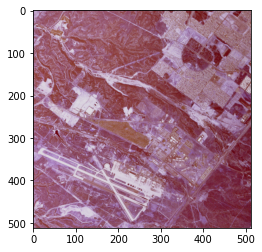

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("2.1.01.tiff")
plt.imshow(img)
plt.show()

In [14]:
#gain = 10
#cutoff = 0.5
newimg = np.copy(img)

newimg[:,:,0] = img[:,:,0]
newimg[:,:,1] = img[:,:,1]
newimg[:,:,2] = img[:,:,2]

In [15]:
# red
LredMin = newimg[..., 0].min()
LredMax = newimg[..., 0].max()

# green
LgreenMin = newimg[..., 1].min()
LgreenMax = newimg[..., 1].max()

# blue
LblueMin = newimg[..., 2].min()
LblueMax = newimg[..., 2].max()

In [16]:
#Normalizing in range [0, 1]

newimg[:,:,0] = (newimg[:,:,0] - LredMin) / (LredMax - LredMin)
mean_r = np.mean(newimg[:,:,0])

newimg[:,:,1] = (newimg[:,:,1] - LgreenMin) / (LgreenMax - LgreenMin)
mean_g = np.mean(newimg[:,:,1])

newimg[:,:,2] = (newimg[:,:,2] - LblueMin) / (LblueMax - LblueMin)
mean_b = np.mean(newimg[:,:,2])

In [17]:
import numpy as np

#alpha = 0.3
#beta = 1.0
#e = 2.71

beta = 1.0
alpha_r = ((np.log(mean_r/255))/np.log(mean_r))* (beta**(np.log(mean_r)))
alpha_g = ((np.log(mean_g/255))/np.log(mean_g))* (beta**(np.log(mean_g)))
alpha_b = ((np.log(mean_b/255))/np.log(mean_b))* (beta**(np.log(mean_b)))


for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        newimg[:,:,0][i][j] = 255 * (newimg[:,:,0][i][j] ** (alpha_r * (beta ** (-np.log(mean_r)))))
        newimg[:,:,1][i][j] = 255 * (newimg[:,:,1][i][j] ** (alpha_g * (beta ** (-np.log(mean_g)))))
        newimg[:,:,2][i][j] = 255 * (newimg[:,:,2][i][j] ** (alpha_b * (beta ** (-np.log(mean_b)))))

newimg = newimg[:,:,0].astype('uint8')

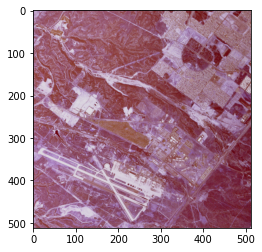

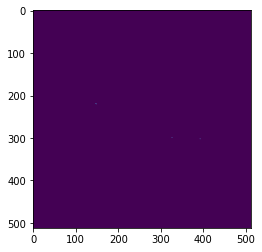

In [18]:
plt.imshow(img)
plt.show()

plt.imshow(newimg)
plt.show()